In [132]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sb 
%matplotlib inline 

from statsmodels.tsa.ar_model import AutoReg 
from sklearn.metrics import mean_squared_error 

In [133]:
# min_tmp = pd.read_csv('../Datasets/daily-min-temperatures.csv', header=0, parse_dates=[0])  
min_tmp = pd.read_csv('../Datasets/daily-min-temperatures.csv', header=0, parse_dates=[0], index_col=0) 
min_tmp 

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [134]:
min_tmp.shape 

(3650, 1)

In [135]:
if not isinstance(min_tmp.index, pd.DatetimeIndex):
    min_tmp.index = pd.to_datetime(min_tmp.index)
    print('Converted index to DateTime format.') 


In [136]:
min_tmp.index = min_tmp.index.to_period('D')      # Works with index_col=0 in read_csv 
min_tmp 

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


Test and Train split - 

In [137]:
train, test = min_tmp[1: (min_tmp.shape[0]-7)], min_tmp[(min_tmp.shape[0]-7):]  

In [138]:
train 

,Temp
Date,
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
1981-01-06,15.8
...,...
1990-12-20,15.4
1990-12-21,13.1
1990-12-22,13.2


In [139]:
test 

,Temp
Date,
1990-12-25,12.9
1990-12-26,14.6
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5
1990-12-30,15.7
1990-12-31,13.0


In [140]:
train_y, test_y = train['Temp'], test['Temp'] 

In [141]:
print(f" y_train size : {train_y.shape} \n y_test size : {test_y.shape}") 
print(f" y_train : {train_y} \n y_test : {test_y}") 

 y_train size : (3642,) 
 y_test size : (7,)
 y_train : Date
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
1981-01-06    15.8
              ... 
1990-12-20    15.4
1990-12-21    13.1
1990-12-22    13.2
1990-12-23    13.9
1990-12-24    10.0
Freq: D, Name: Temp, Length: 3642, dtype: float64 
 y_test : Date
1990-12-25    12.9
1990-12-26    14.6
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Freq: D, Name: Temp, dtype: float64


# Auto-Regression Model -  
(Regression of lagged values) 

In [142]:
l = int(input("Number of Lags : ")) 
model = AutoReg(train['Temp'], lags=l)    
model_fit = model.fit() 
model_fit 

In [143]:
# Number of lag variables 

# kar = model_fit.k_ar 
# kar 

In [144]:
# Coefficient of lag values 
model_fit.params 

const       0.583550
Temp.L1     0.588183
Temp.L2    -0.089274
Temp.L3     0.048258
Temp.L4     0.039940
Temp.L5     0.039104
Temp.L6     0.026316
Temp.L7     0.043504
Temp.L8     0.012812
Temp.L9     0.037543
Temp.L10    0.000689
Temp.L11    0.006813
Temp.L12    0.018647
Temp.L13    0.023971
Temp.L14    0.002294
Temp.L15    0.026245
Temp.L16    0.005016
Temp.L17    0.012394
Temp.L18    0.033577
Temp.L19   -0.009459
Temp.L20    0.025420
Temp.L21    0.019458
Temp.L22    0.012992
Temp.L23   -0.016212
Temp.L24   -0.003037
Temp.L25    0.016218
Temp.L26    0.019510
Temp.L27    0.011479
Temp.L28    0.007531
Temp.L29    0.003314
Temp.L30   -0.013103
Temp.L31    0.038442
Temp.L32   -0.034966
Temp.L33    0.009372
Temp.L34    0.025886
Temp.L35   -0.005567
Temp.L36   -0.021725
Temp.L37   -0.030816
Temp.L38    0.016180
dtype: float64

In [145]:
preds = model_fit.predict(start=len(train), end=(len(train) + len(test) - 1))  
preds 

1990-12-23    12.018163
1990-12-24    13.321838
1990-12-25    13.727340
1990-12-26    13.029551
1990-12-27    13.304269
1990-12-28    13.395999
1990-12-29    13.159970
Freq: D, dtype: float64

In [146]:
mse_test = mean_squared_error(test_y, preds) 
print(f"Mean Squared Error (Test) : {mse_test}") 

Mean Squared Error (Test) : 1.1690588515095952


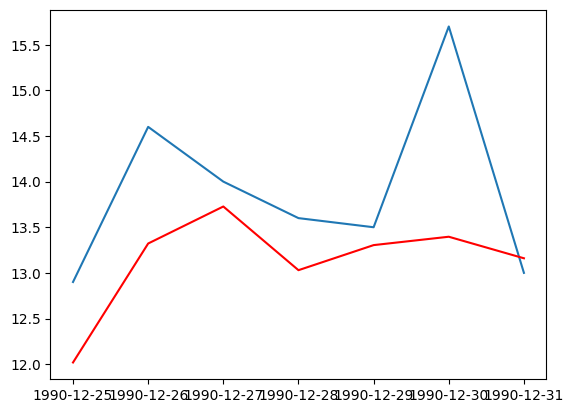

In [147]:
plt.plot(test_y.index.to_timestamp(), test_y)  
plt.plot(test_y.index.to_timestamp(), preds, color='red') 

Walk-Forward Validation -  

In [148]:
train, test = min_tmp.Temp[1: (min_tmp.shape[0]-7)], min_tmp.Temp[(min_tmp.shape[0]-7):]  

In [149]:
train 

Date
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
1981-01-06    15.8
              ... 
1990-12-20    15.4
1990-12-21    13.1
1990-12-22    13.2
1990-12-23    13.9
1990-12-24    10.0
Freq: D, Name: Temp, Length: 3642, dtype: float64

In [150]:
test 

Date
1990-12-25    12.9
1990-12-26    14.6
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Freq: D, Name: Temp, dtype: float64

In [151]:
# data = train     # Data variable to hold test values for future predictions 
# model = AutoReg(data, lags=l) 

l = int(input("Number of Lags : ")) 
model = AutoReg(train, lags=l) 
model_fit = model.fit() 

prev = list(train)     # Store past observations 
pred_y_val = [] 

for t in test:

    y = model_fit.predict(start=len(prev), end=len(prev)) 
    print(y.values[0]) 
    
    pred_y_val.append(y.values[0]) 
    prev.append(t)  


# for t in test:
#     y = model_fit.predict(start=len(train), end=(len(train) + len(test) - 1)) 
#     print(y.values[0]) 
#     pred_y_val.append(y.values[0]) 

#     data = np.append(data, t) 
#     data = pd.Series(data) 

12.054371514553265
13.34405759164243
13.612468824093803
13.103875097665682
13.323494563711098
13.36730526877388
13.119491502027703


In [152]:
pred_y_val 

[np.float64(12.054371514553265),
 np.float64(13.34405759164243),
 np.float64(13.612468824093803),
 np.float64(13.103875097665682),
 np.float64(13.323494563711098),
 np.float64(13.36730526877388),
 np.float64(13.119491502027703)]

In [153]:
test.values 

array([12.9, 14.6, 14. , 13.6, 13.5, 15.7, 13. ])

In [154]:
mse_test_wf = mean_squared_error(test.values, pred_y_val) 
print(f"Mean Squared Error (Test) : {mse_test_wf}") 

Mean Squared Error (Test) : 1.1679566138159851


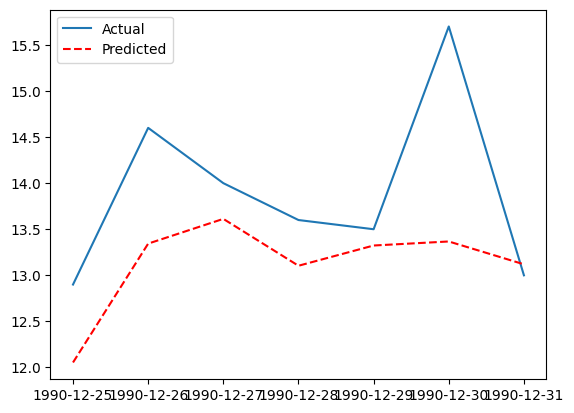

In [155]:
plt.plot(test.index.to_timestamp(), test.values, label="Actual")
plt.plot(test.index.to_timestamp(), pred_y_val, color='red', linestyle='dashed', label="Predicted")
plt.legend() 
plt.show() 